# Import the necessary libraries 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot

# Load the dataset

In [8]:
# Establish the file path.
file_path = 'MS9004_Assignment_2425s2.xlsx'
# Read the xls file.
df = pd.read_excel(file_path)

# 1. Explore Data 

Perform exploratory analysis on the variables using the whole data set.
Describe the data and comment on your observations/findings.

In [16]:
# Display first 10 rows
display(df.head(10))

,risk,length,age,cultures,xray,bed,patient,nurse,facilities,affiliation,region
0,4.1,7.13,55.7,9.0,39.6,279,207,241,60.0,no,W
1,1.6,8.82,58.2,3.8,51.7,80,51,52,40.0,no,NC
2,2.7,8.34,56.9,8.1,74.0,107,82,54,20.0,no,S
3,5.6,8.95,53.7,18.9,122.8,147,53,148,40.0,no,W
4,5.7,11.20,56.5,34.5,88.9,180,134,151,40.0,no,NE
5,5.1,9.76,50.9,21.9,97.0,150,147,106,40.0,no,NC
6,4.6,9.68,57.8,16.7,79.0,186,151,129,40.0,no,S
7,5.4,11.18,45.7,60.5,85.8,640,399,360,60.0,yes,NC
8,4.3,8.67,48.2,24.4,90.8,182,130,118,40.0,no,S
9,6.3,8.84,56.3,29.6,82.6,85,59,66,40.0,no,NE


In [18]:
# Display last 10 rows
display(df.tail(10))

,risk,length,age,cultures,xray,bed,patient,nurse,facilities,affiliation,region
103,6.6,13.95,65.9,15.6,133.5,356,308,182,62.9,no,NE
104,4.5,9.44,52.5,10.9,58.5,297,230,263,42.9,no,S
105,2.9,10.80,63.9,1.6,57.4,130,69,62,22.9,no,S
106,1.4,7.14,51.7,4.1,45.7,115,90,19,22.9,no,S
107,2.1,8.02,55.0,3.8,46.5,91,44,32,22.9,no,NC
108,5.7,11.80,53.8,9.1,116.9,571,441,469,62.9,yes,NC
109,5.8,9.50,49.3,42.0,70.9,98,68,46,22.9,no,S
110,4.4,7.70,56.9,12.2,67.9,129,85,136,62.9,no,W
111,5.9,17.94,56.2,26.4,91.8,835,791,407,62.9,yes,NE
112,3.1,9.41,59.5,20.6,91.7,29,20,22,22.9,no,S


In [20]:
# To know the dimensions of the data matrix, type: df.shape
df.shape

(113, 11)

In [22]:
# A qualitative predictor is identified as an "object" type.
# Check data types, type: df.dtypes
df.dtypes

risk           float64
length         float64
age            float64
cultures       float64
xray           float64
bed              int64
patient          int64
nurse            int64
facilities     float64
affiliation     object
region          object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   risk         113 non-null    float64
 1   length       113 non-null    float64
 2   age          113 non-null    float64
 3   cultures     113 non-null    float64
 4   xray         113 non-null    float64
 5   bed          113 non-null    int64  
 6   patient      113 non-null    int64  
 7   nurse        113 non-null    int64  
 8   facilities   113 non-null    float64
 9   affiliation  113 non-null    object 
 10  region       113 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 9.8+ KB


In [30]:
df["region"].unique()

array(['W', 'NC', 'S', 'NE'], dtype=object)

In [32]:
df["affiliation"].unique()

array(['no', 'yes'], dtype=object)

In [26]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,risk,length,age,cultures,xray,bed,patient,nurse,facilities
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,4.354867,9.648319,53.231858,15.792920,81.628319,252.168142,191.371681,173.247788,43.159292
std,1.340908,1.911456,4.461607,10.234707,19.363826,192.842687,153.759564,139.265390,15.200861
min,1.300000,6.700000,38.800000,1.600000,39.600000,29.000000,20.000000,14.000000,5.700000
25%,3.700000,8.340000,50.900000,8.400000,69.500000,106.000000,68.000000,66.000000,31.400000
50%,4.400000,9.420000,53.200000,14.100000,82.300000,186.000000,143.000000,132.000000,42.900000
75%,5.200000,10.470000,56.200000,20.300000,94.100000,312.000000,252.000000,218.000000,54.300000
max,7.800000,19.560000,65.900000,60.500000,133.500000,835.000000,791.000000,656.000000,80.000000


In [36]:
df.corr(numeric_only=True)

,risk,length,age,cultures,xray,bed,patient,nurse,facilities
risk,1.000000,0.533444,0.001093,0.559159,0.453392,0.359770,0.381411,0.393981,0.412601
length,0.533444,1.000000,0.188914,0.326684,0.382482,0.409265,0.473885,0.340367,0.355538
age,0.001093,0.188914,1.000000,-0.225847,-0.018855,-0.058823,-0.054775,-0.082945,-0.040451
cultures,0.559159,0.326684,-0.225847,1.000000,0.424962,0.139725,0.142948,0.198900,0.185131
xray,0.453392,0.382482,-0.018855,0.424962,1.000000,0.045820,0.062914,0.077381,0.111928
bed,0.359770,0.409265,-0.058823,0.139725,0.045820,1.000000,0.980998,0.915504,0.794524
patient,0.381411,0.473885,-0.054775,0.142948,0.062914,0.980998,1.000000,0.907897,0.778063
nurse,0.393981,0.340367,-0.082945,0.198900,0.077381,0.915504,0.907897,1.000000,0.783505
facilities,0.412601,0.355538,-0.040451,0.185131,0.111928,0.794524,0.778063,0.783505,1.000000


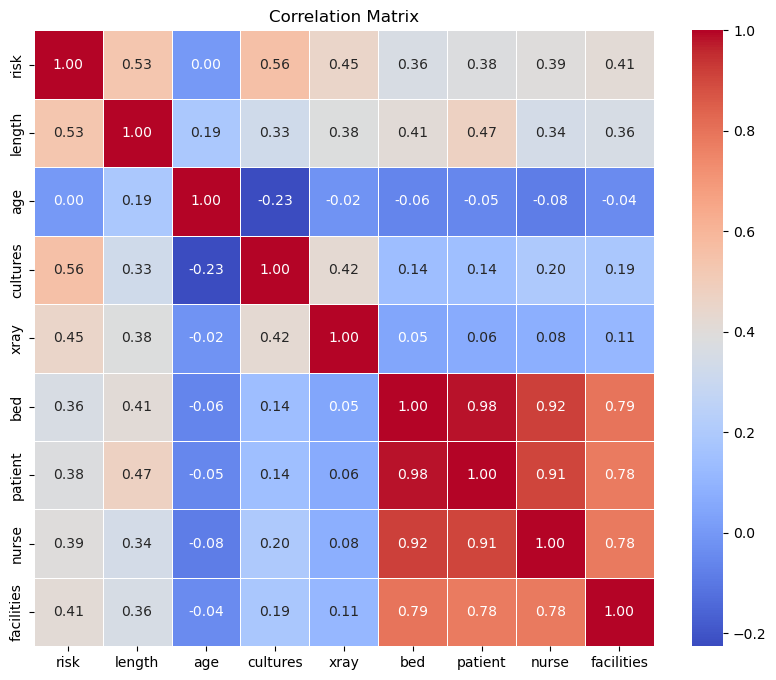

In [46]:
# Correlation Heatmap - Only numeric columns
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

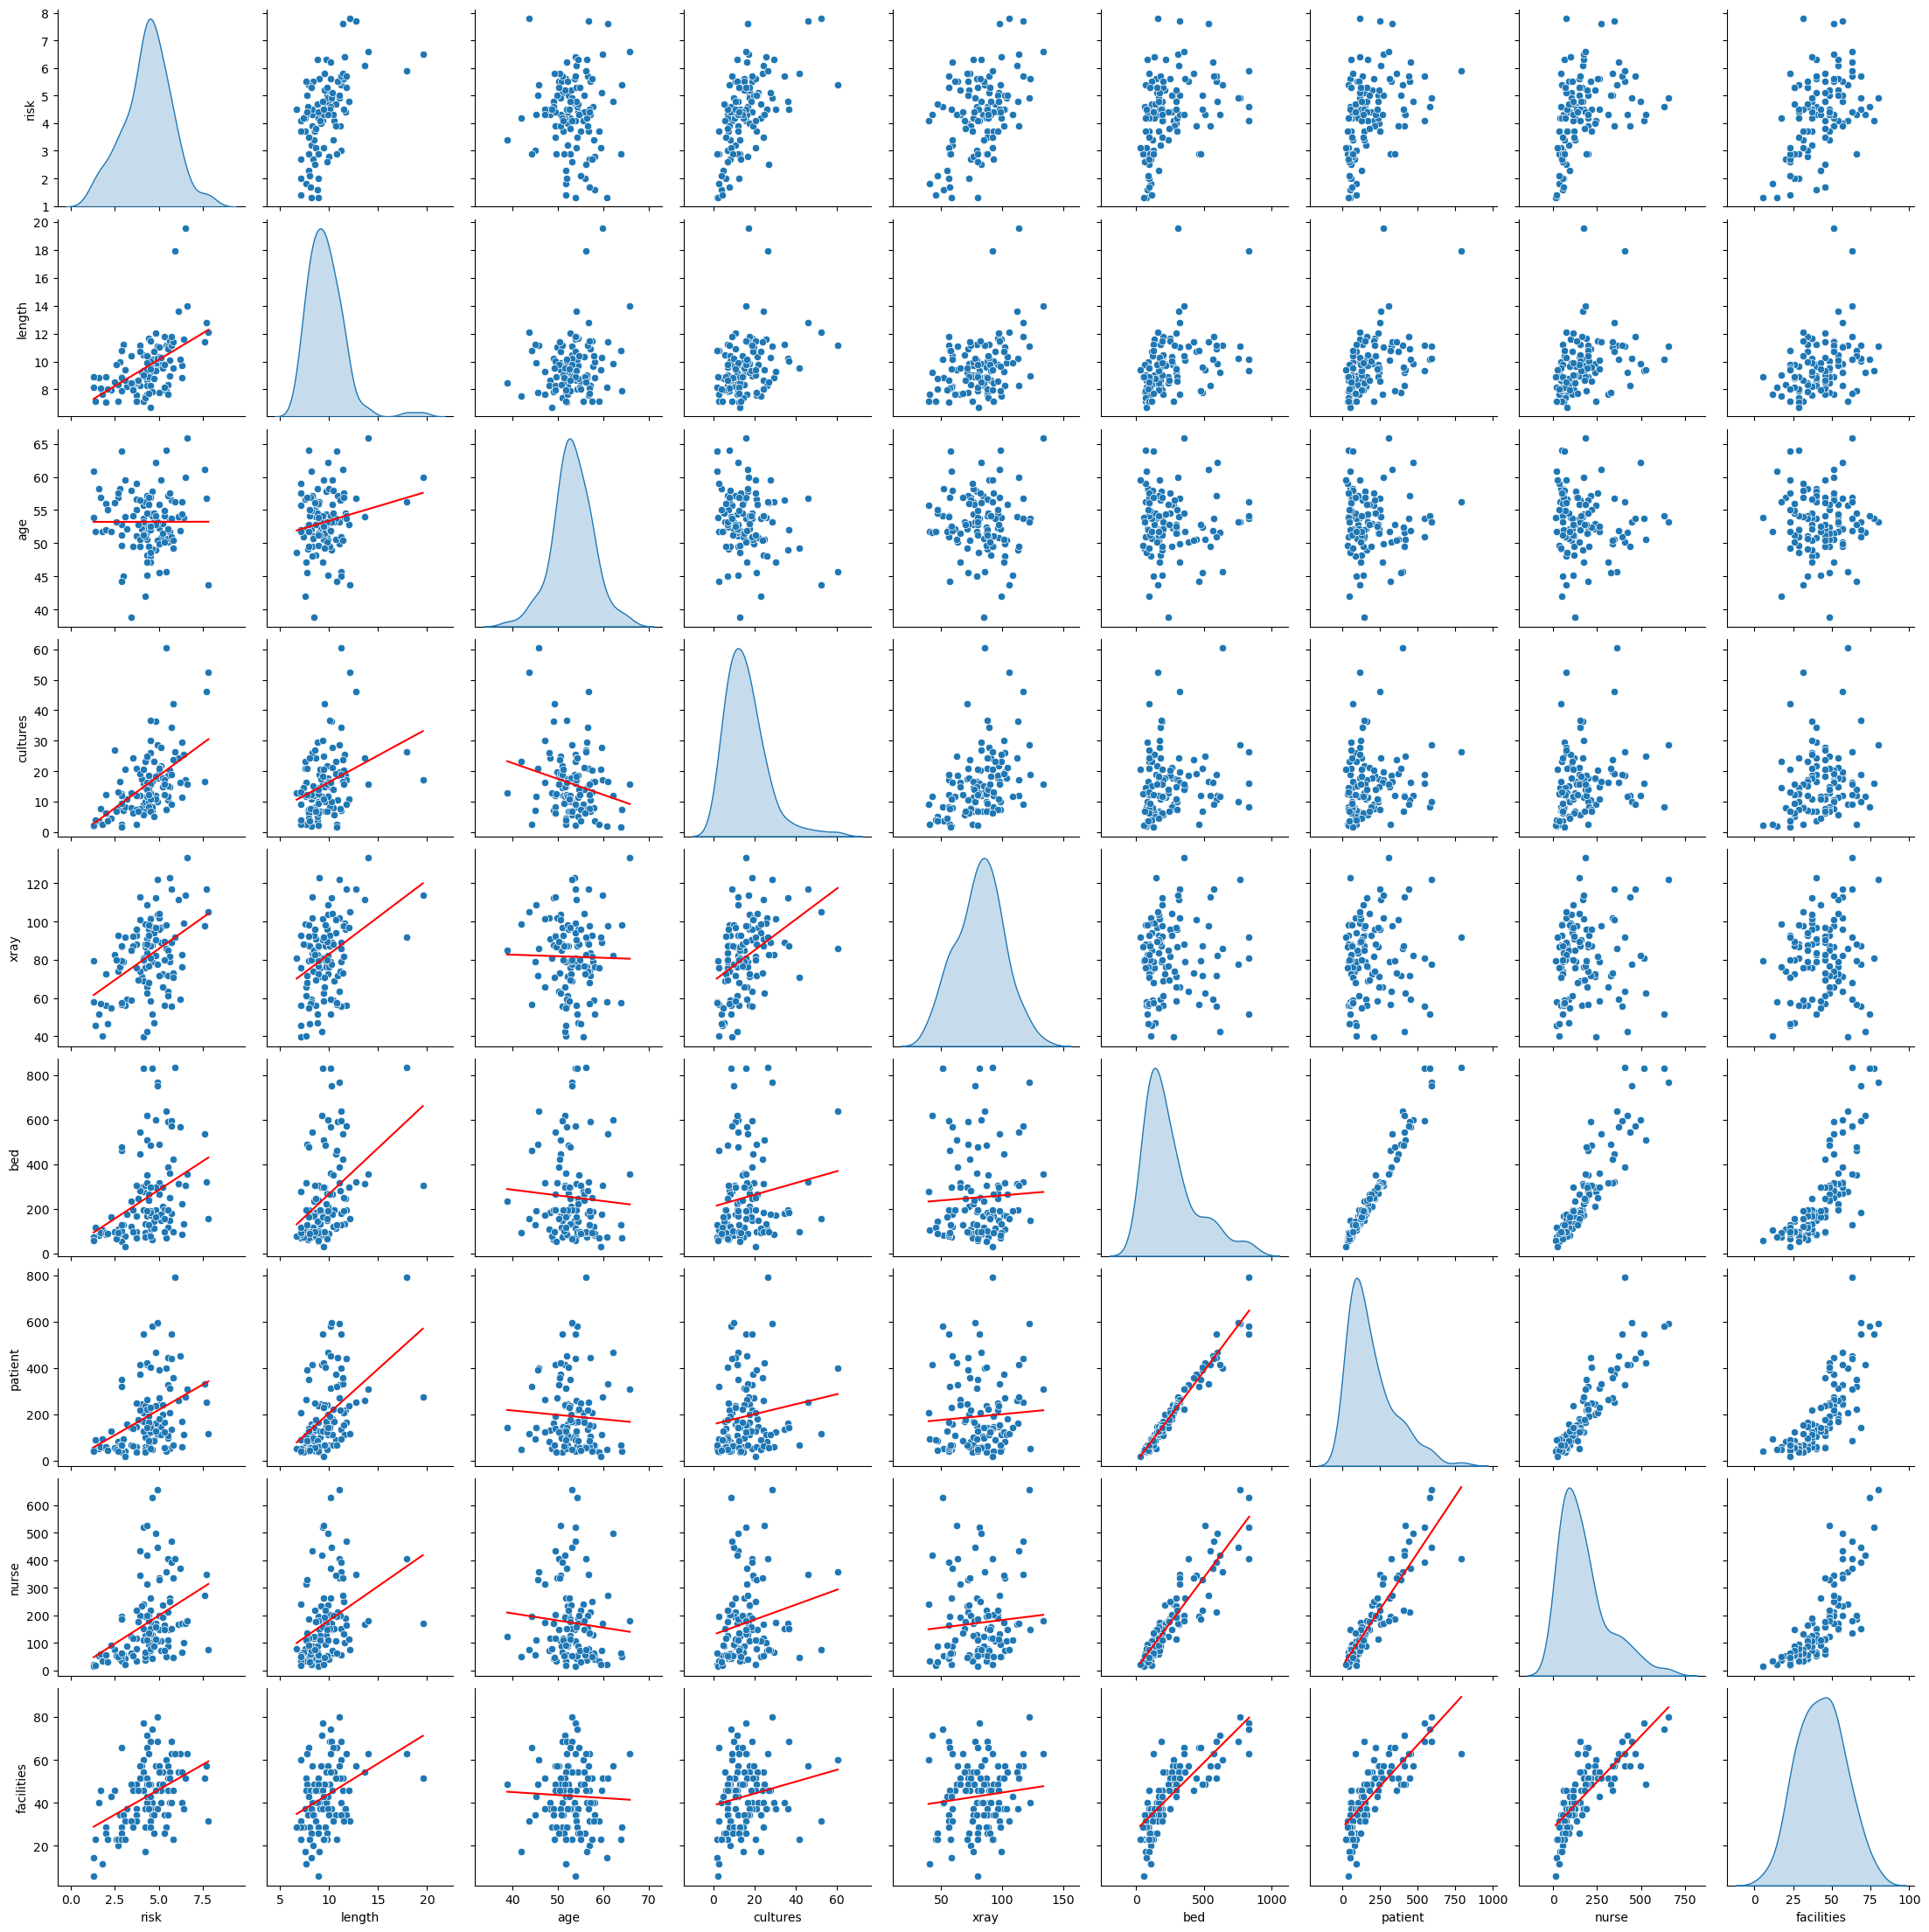

In [40]:

# Create the pairplot
g = sns.pairplot(df, diag_kind='kde')

# Add a red regression line to the scatter plots
def add_reg_line(x, y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x, y=y, scatter=False, ax=ax, color="red", ci=None, line_kws={"linewidth": 1.5})

g.map_lower(add_reg_line)  # Apply the regression line to the lower triangle

plt.show()

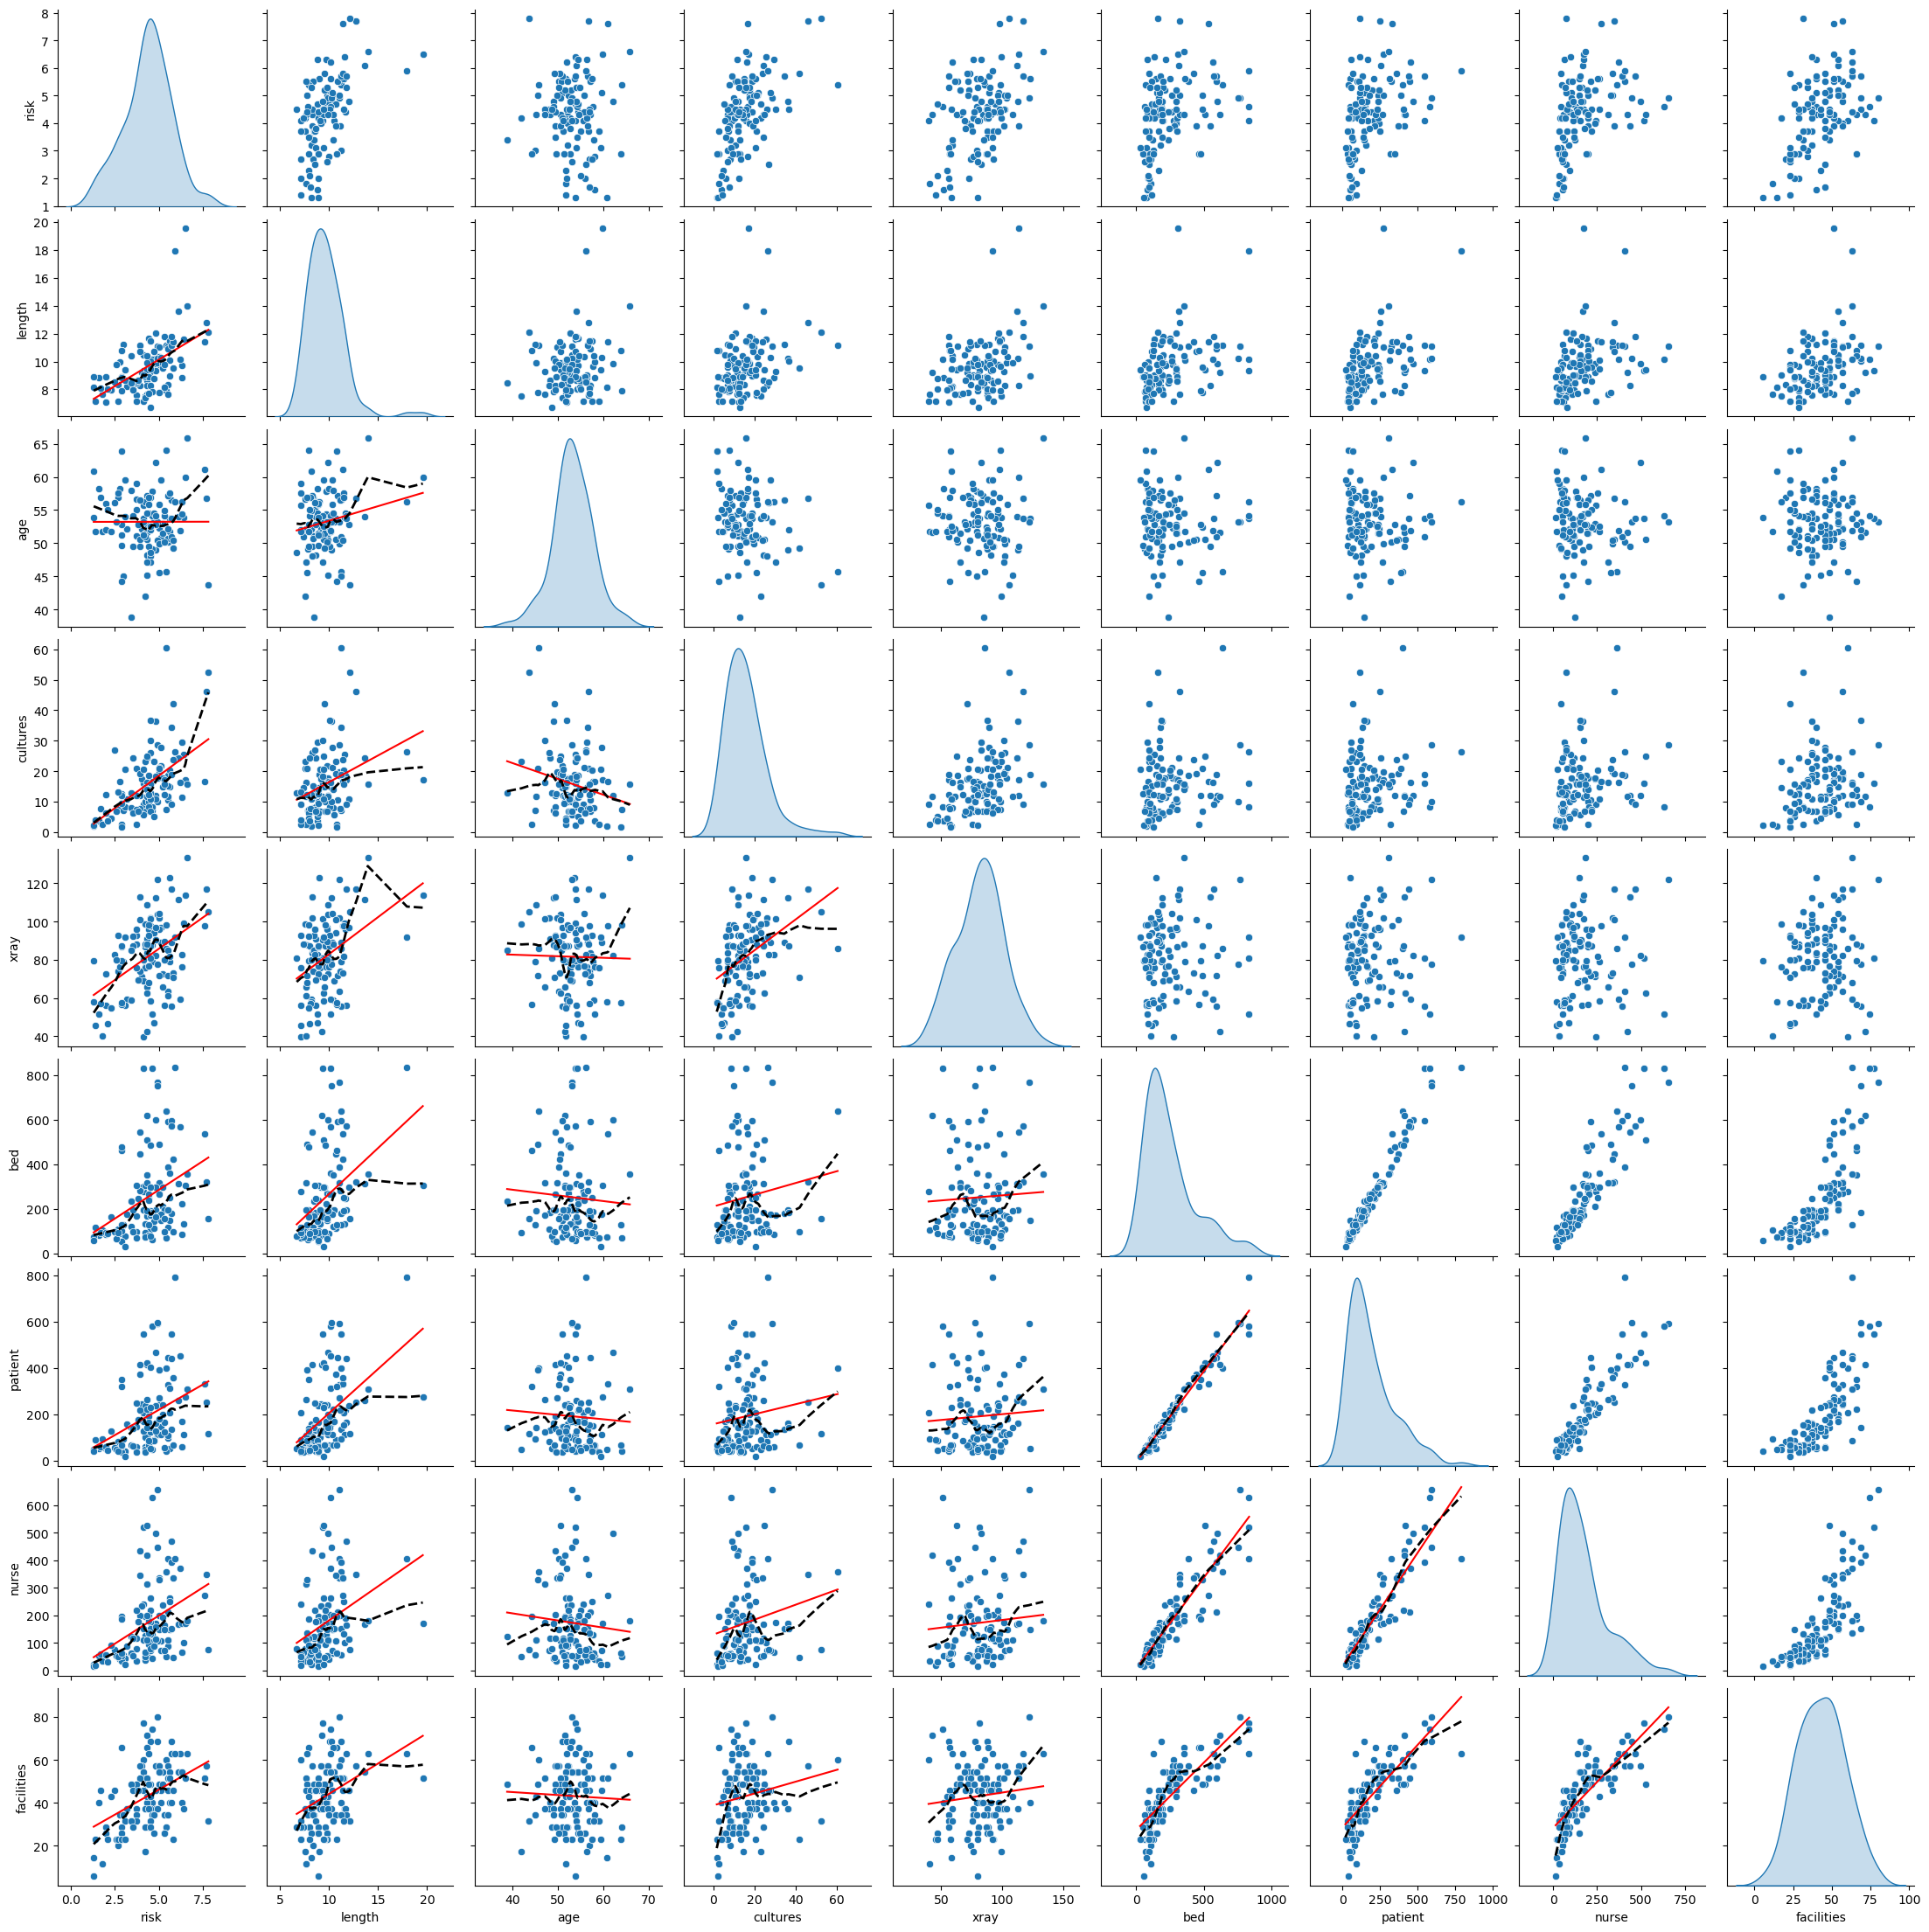

In [72]:
# Function to add LOWESS (Locally Weighted Scatterplot Smoothing) line
def add_lowess_line(x, y, **kwargs):
    ax = plt.gca()
    lowess = sm.nonparametric.lowess(y, x, frac=0.3)  # frac controls smoothness
    ax.plot(lowess[:, 0], lowess[:, 1], color='black', linewidth=2, linestyle='--')

# Create the pairplot
g = sns.pairplot(df, diag_kind='kde')

# Add regression (red) and cluster (blue) lines
def add_reg_and_cluster_line(x, y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x, y=y, scatter=False, ax=ax, color="red", ci=None, line_kws={"linewidth": 1.5})
    add_lowess_line(x, y)

g.map_lower(add_reg_and_cluster_line)  # Apply both lines to the lower triangle

plt.show()

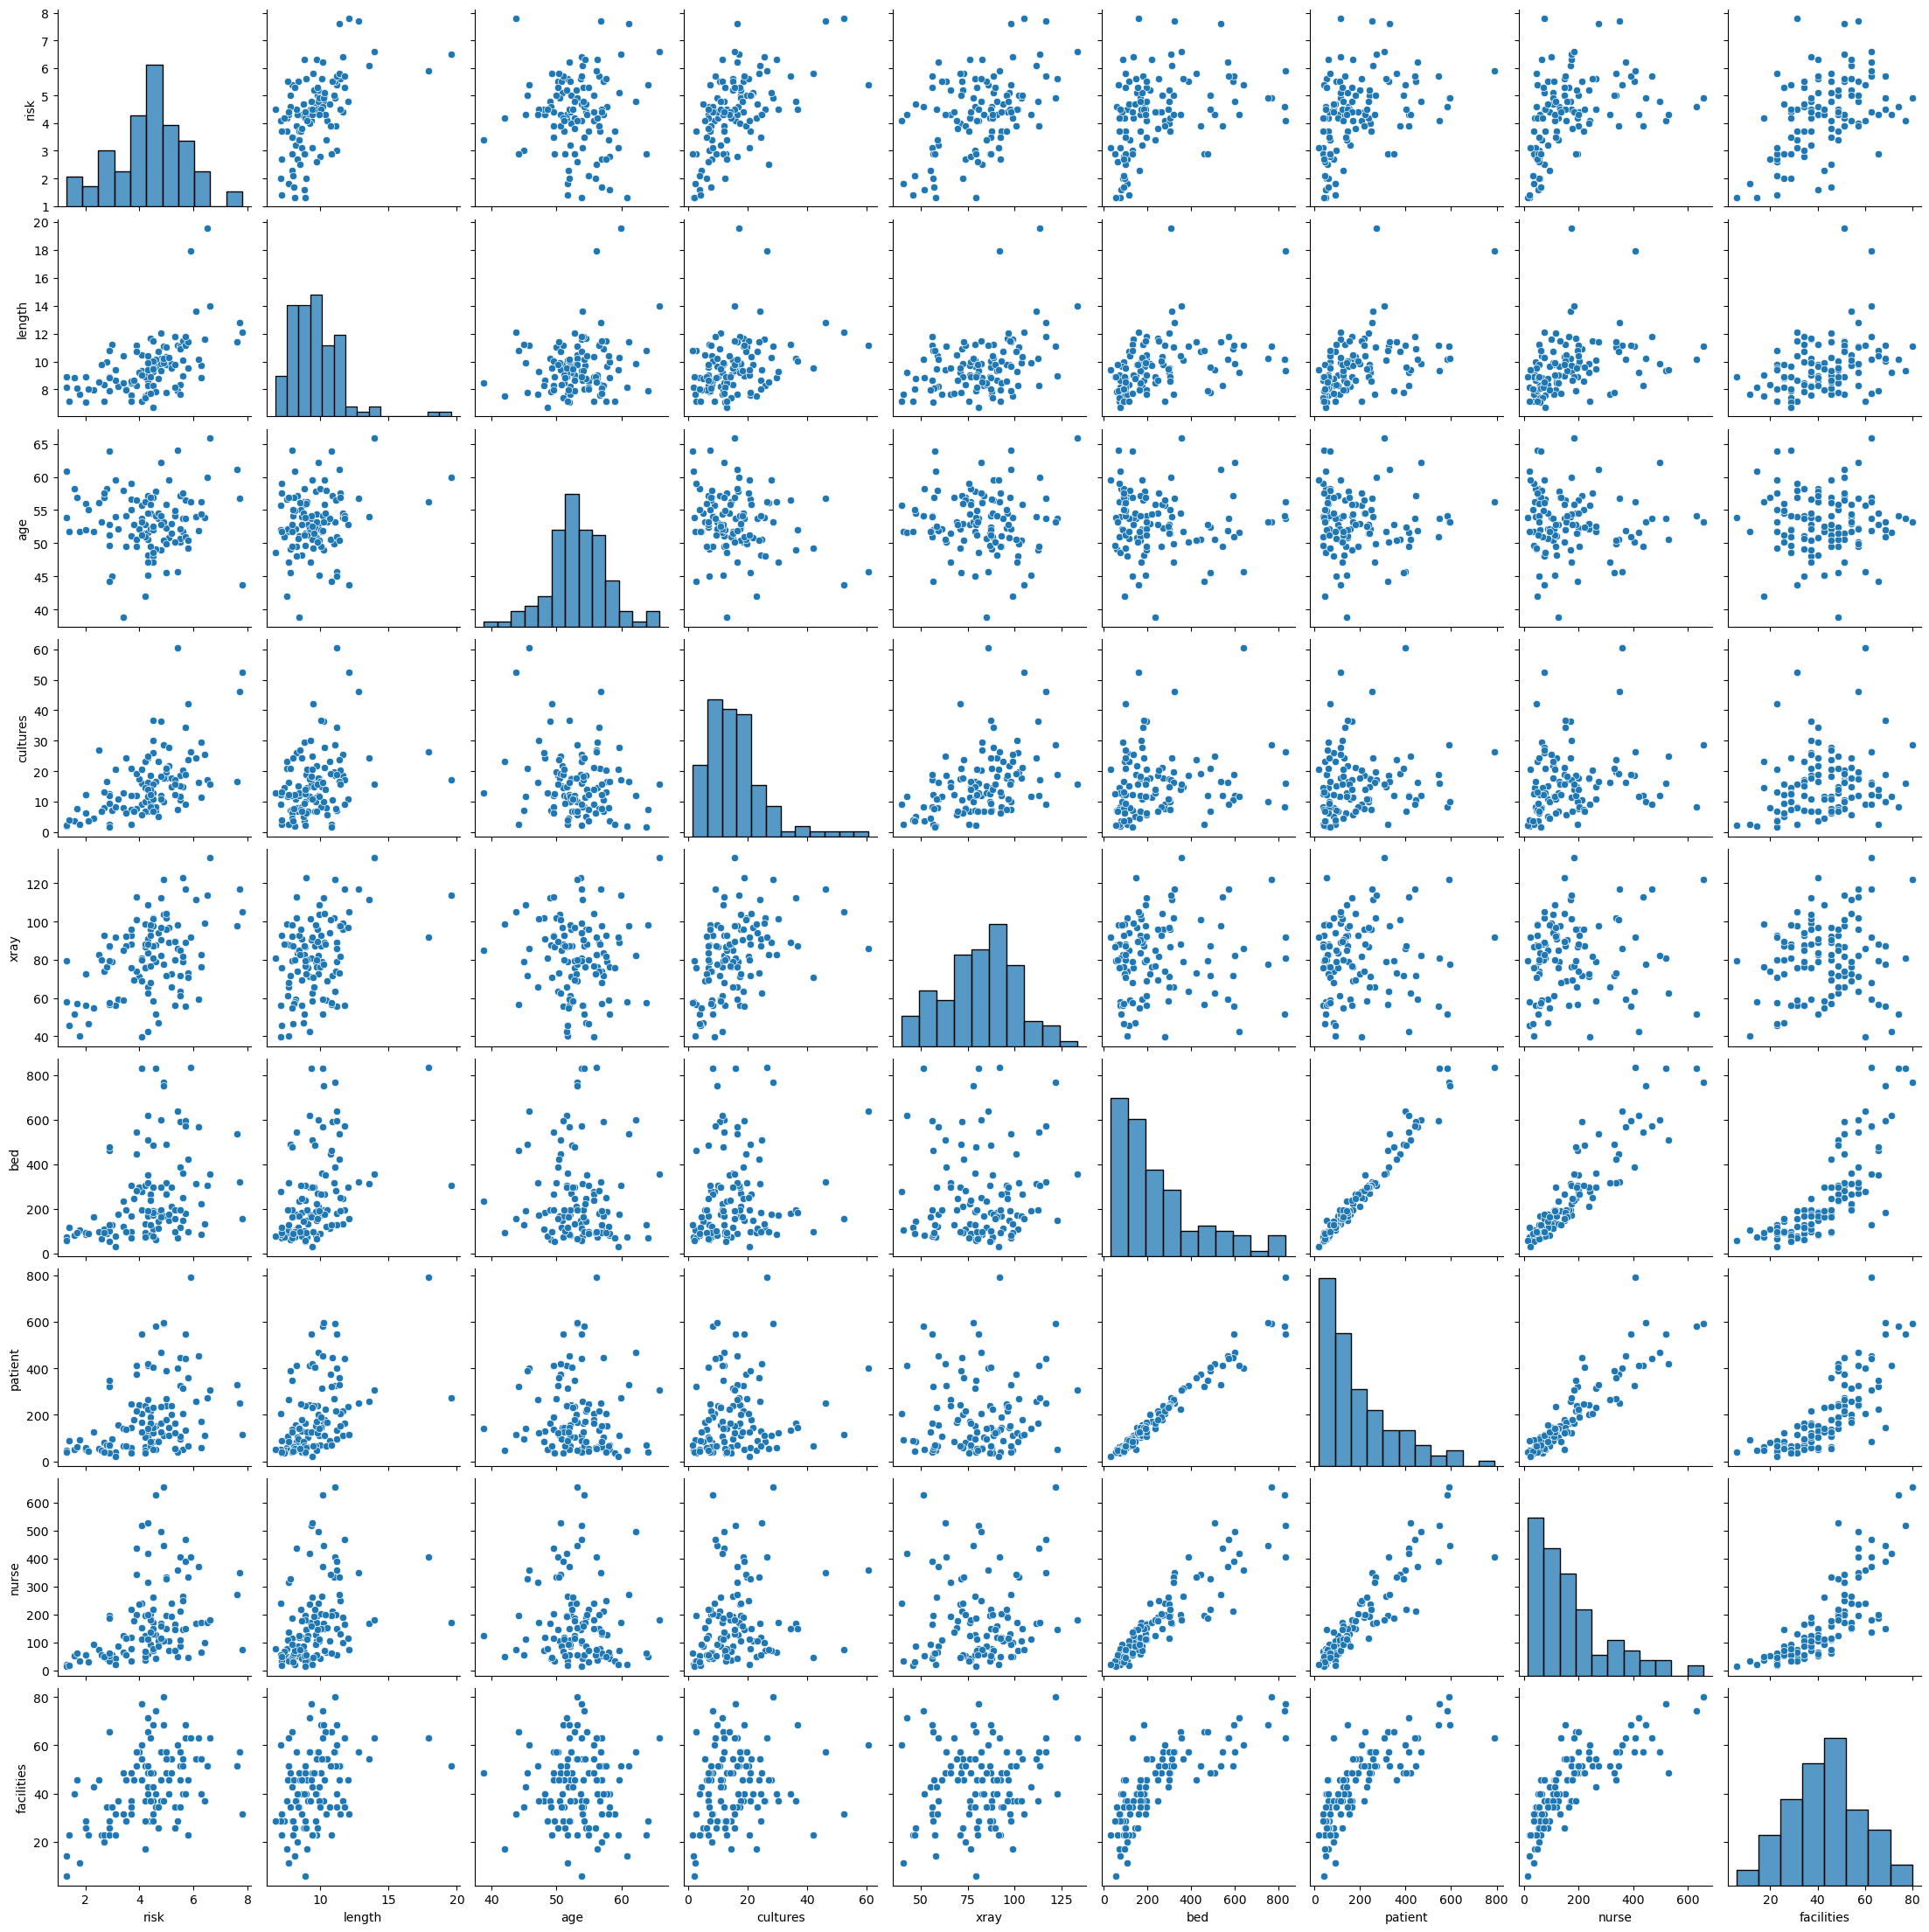

In [44]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

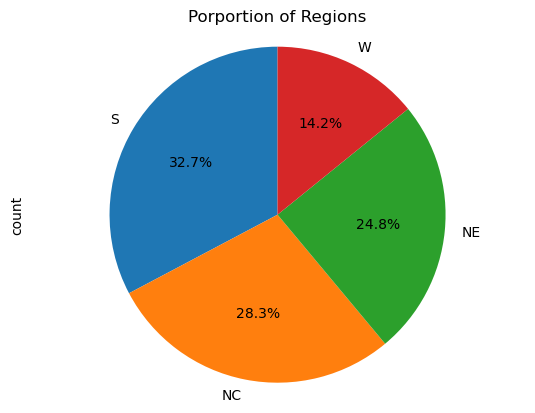

In [70]:
df['region'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title("Porportion of Regions")
plt.axis('equal')
plt.show()

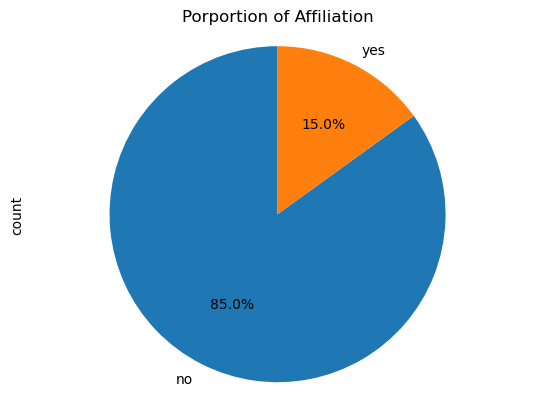

In [68]:
df['affiliation'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title("Porportion of Affiliation")
plt.axis('equal')
plt.show()

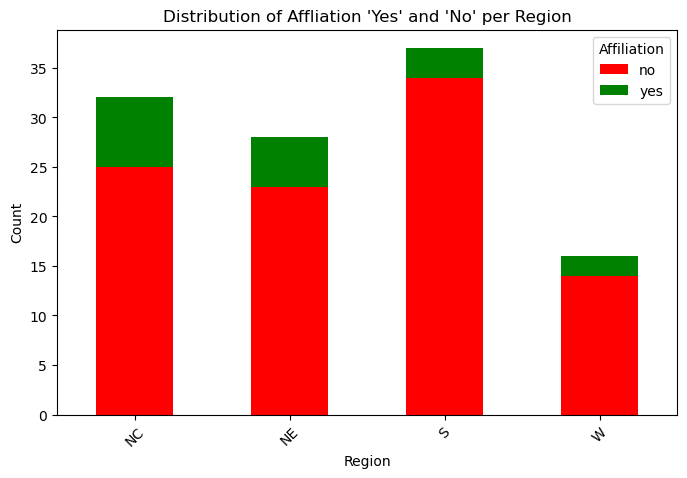

In [60]:
# Count occurrences of 'yes' and 'no' per region
region_counts = df.groupby(["region", "affiliation"]).size().unstack()

# Plot a stacked bar chart
region_counts.plot(kind="bar", stacked=True, figsize=(8, 5), color=["red", "green"])

# Labels and title
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of Affliation 'Yes' and 'No' per Region")
plt.legend(title="Affiliation")
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 2. Fit Model

## Split the data set into training set and test set in a ratio of 75:25 (approximately).
## Set random state using the last 4 digits of your SP admission number.

In [83]:
# Splitting the dataset (75% training, 25% testing)
train_df, test_df = train_test_split(df, test_size=0.25, random_state=5291)

In [85]:
# Display the sizes of each split
print(f"Training Set: {train_df.shape}")
print(f"Test Set: {test_df.shape}")

Training Set: (84, 11)
Test Set: (29, 11)


## Fit the full additive MLR model on the training set.

In [99]:
# Fit the full MLR model.
# Type your code here:
mlr = smf.ols('risk ~ length + age + cultures + xray + bed  + patient + nurse + facilities + affiliation + region', train_df).fit()
print(mlr.summary())
print('\nMSE =', mlr.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     10.85
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           7.55e-12
Time:                        15:21:57   Log-Likelihood:                -99.652
No. Observations:                  84   AIC:                             225.3
Df Residuals:                      71   BIC:                             256.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1424      1

# 3. Evaluate Model 

In [164]:
# Extract R-squared and Adjusted R-squared
r_squared = mlr.rsquared
adj_r_squared = mlr.rsquared_adj
print("\nR-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)
# Mean Squared Error (MSE) on training data
train_mse = mlr.mse_resid
print("\nTraining MSE:", train_mse)


R-squared: 0.6470585105259865
Adjusted R-squared: 0.5874064277979842

Training MSE: 0.7429874029059934


In [166]:
# Predict on the test dataset
test_df['predicted_risk'] = mlr.predict(test_df)
print(mlr.predict(test_df))

# Evaluate model performance
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(test_df['risk'], test_df['predicted_risk'])
print("Test MSE =", mse_test)
# Print all required prediction statistics
print(predictions[['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower', 'obs_ci_upper']])

52     4.979534
34     4.094793
31     4.749770
92     2.568066
19     4.875390
110    4.506244
10     6.668612
75     3.949346
25     4.479963
2      3.159883
90     3.582623
47     3.768101
56     3.354425
9      4.314931
54     2.579019
66     4.183030
18     3.453191
73     5.221022
44     3.708796
96     3.600132
88     4.291708
22     4.320418
57     4.948751
112    4.357646
63     3.962868
8      4.608997
51     3.759089
39     2.418732
61     4.806415
dtype: float64
Test MSE = 1.229442051088816
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   4.979534  0.575216       3.832586       6.126482      2.913265   
1   4.094793  0.271001       3.554432       4.635154      2.293136   
2   4.749770  0.397765       3.956650       5.542890      2.856884   
3   2.568066  0.437178       1.696358       3.439773      0.640930   
4   4.875390  0.666258       3.546909       6.203871      2.703101   
5   4.506244  0.467957       3.573165       5.439323      2.550582   
6 

In [109]:
# Check VIFs
# Type: for i in range(5):
#           predictor = modelname.model.exog_names[i]
#           Vif = vif(modelname.model.exog, i)
#           print(predictor, Vif)
for i in range(13):
    predictor = mlr.model.exog_names[i]
    Vif = vif(mlr.model.exog, i)
    print(predictor, Vif)

Intercept 178.9280038819232
affiliation[T.yes] 2.119014783944837
region[T.NE] 2.0234824358087495
region[T.S] 1.9077985264937107
region[T.W] 1.5410726099435827
length 2.545611715793667
age 1.265624464430535
cultures 1.6188095304883192
xray 1.5639853916811752
bed 47.0708848913553
patient 43.4624110789282
nurse 6.321661820417416
facilities 3.3159629523983085


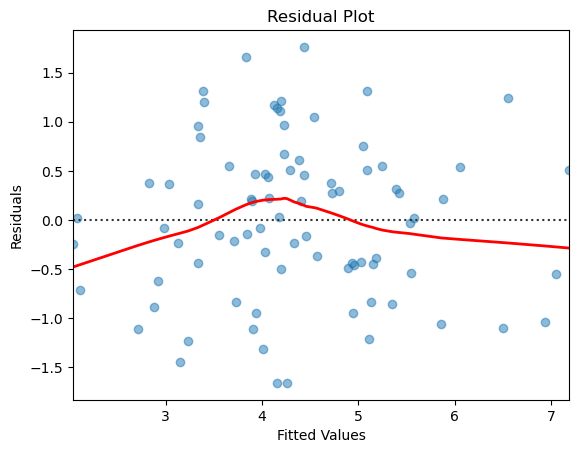

In [119]:
# Residual plot
sns.residplot(x=mlr.fittedvalues, y=mlr.resid, lowess=True, 
              line_kws={'color': 'red', 'lw': 2}, scatter_kws={"alpha": 0.5})

# Labels & Title
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

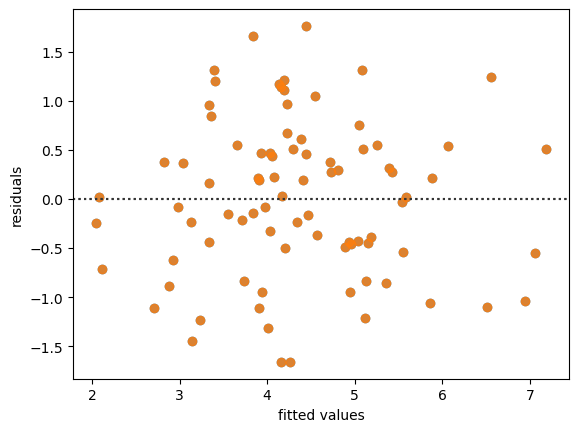

In [129]:
# Produce the residual plot.
# Type your code here:
sns.residplot(x=mlr.fittedvalues, y=mlr.resid)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

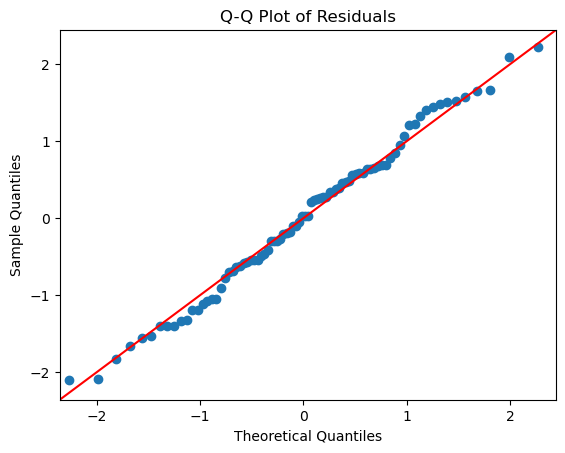

In [133]:
# Create a Q-Q plot
sm.qqplot(mlr.resid, line='45', fit=True)

# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Show the plot
plt.show()

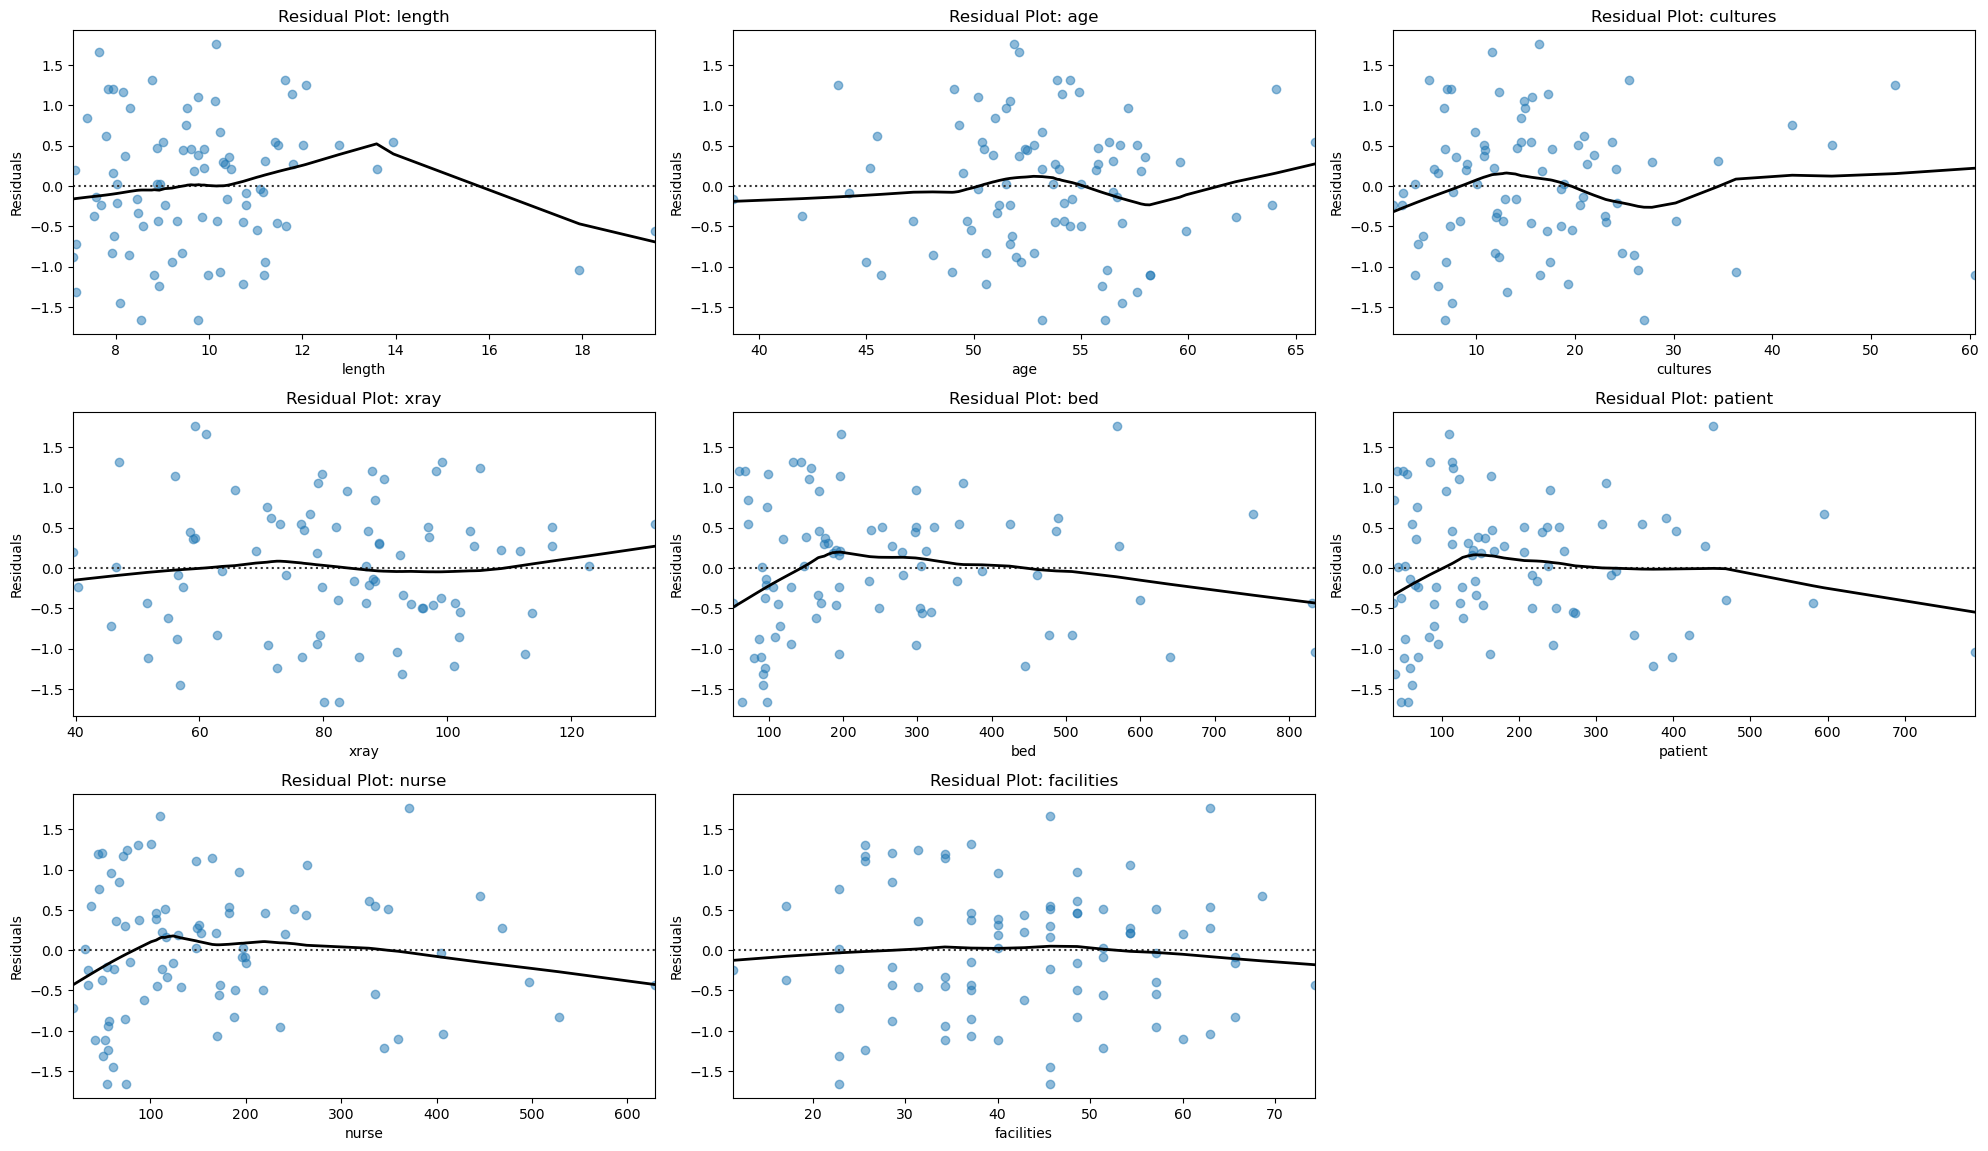

In [131]:
# Define only numeric predictors
numeric_predictors = train_df.select_dtypes(include=['number']).columns.drop('risk')

# Create subplots (arrange for 11 predictors)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Loop through numeric predictors and create residual plots
for i, predictor in enumerate(numeric_predictors):
    sns.residplot(x=train_df[predictor], y=mlr.resid, lowess=True, 
                  line_kws={'color': 'black', 'lw': 2}, scatter_kws={"alpha": 0.5}, ax=axes[i])
    
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residual Plot: {predictor}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

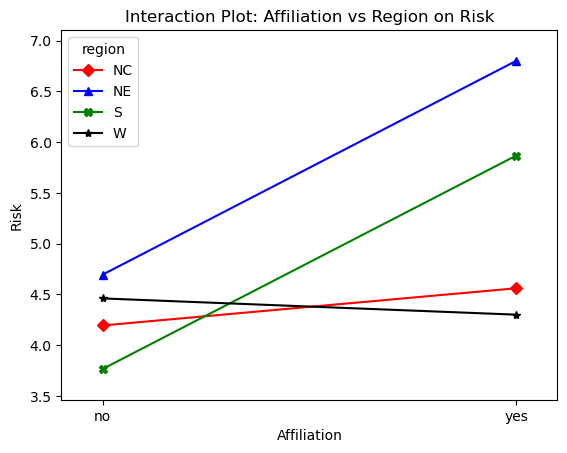

In [145]:
# Generate interaction plot
fig = interaction_plot(x=train_df['affiliation'], 
                       trace=train_df['region'], 
                       response=train_df['risk'], 
                       colors=['red','blue','green','black'], 
                       markers=['D','^','X','*'])

# Add title and labels
plt.title("Interaction Plot: Affiliation vs Region on Risk")
plt.xlabel("Affiliation")
plt.ylabel("Risk")

# Show plot
plt.show()

In [178]:
# Extract residuals.
# Type your code here:
res = mlr.resid
print(res)

27     0.376581
6      0.191513
5      0.380562
60     0.364073
109    0.753640
         ...   
28    -0.493283
30    -0.544353
87    -0.161004
46    -0.553623
13    -0.141163
Length: 84, dtype: float64


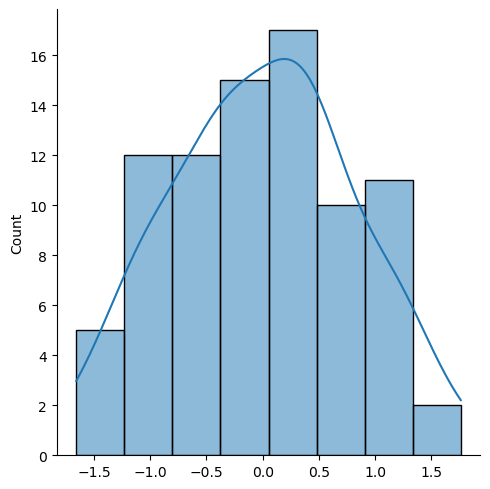

In [184]:
sns.displot(res, kde=True)
plt.show()

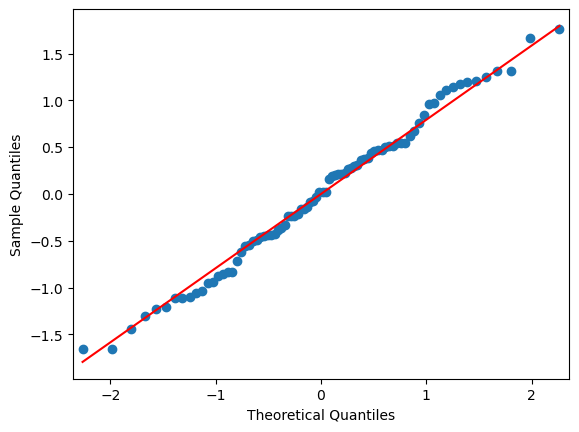

In [186]:
sm.qqplot(res, line='s')

In [188]:
sm.stats.jarque_bera(res)

(1.4245062841317742,
 0.4905377002540259,
 0.0038368462347042076,
 2.3620792291278594)

In [190]:
sm.stats.omni_normtest(res)

NormaltestResult(statistic=2.0815318436544357, pvalue=0.3531840669511357)

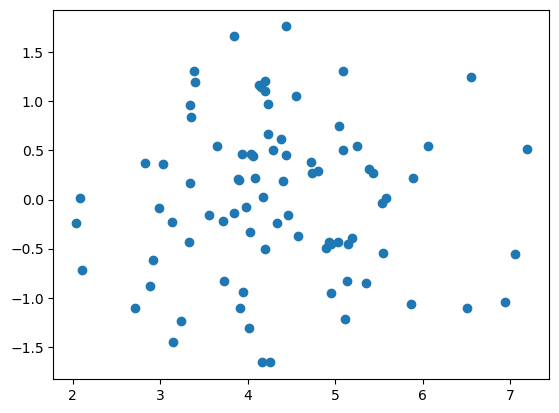

In [198]:
plt.plot(mlr.fittedvalues, res, 'o')
plt.show()

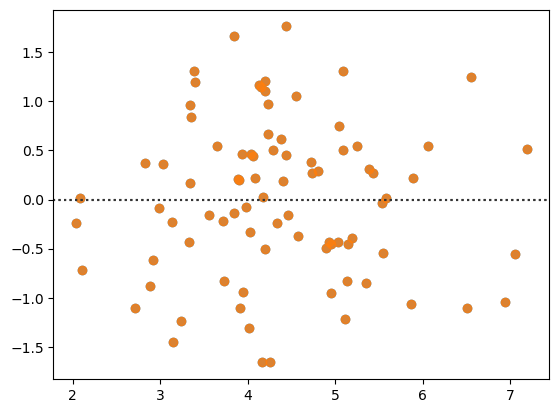

In [202]:
sns.residplot(x=mlr.fittedvalues, y=res)
plt.show()

In [204]:
sm.stats.het_breuschpagan(res, mlr.model.exog)

(17.54056858221391, 0.1303691395745407, 1.56157967696653, 0.1231660085328887)

In [206]:
mlr.condition_number

6002.490090690884

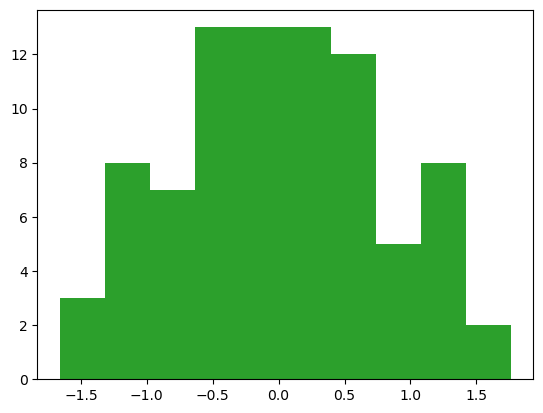

In [176]:
plt.hist(mlr.resid)
plt.show()

In [168]:
# Now, generate a scatterplot of Salary vs Experience, traced by qualitiative variable Management
# Type: sns.lmplot(x="Experience", y="Salary", data=df, hue="Management", fit_reg=False);
sns.lmplot(x="re", y="risk", data=df, hue="affiliation", fit_reg=False);

KeyError: "['re'] not in index"